[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


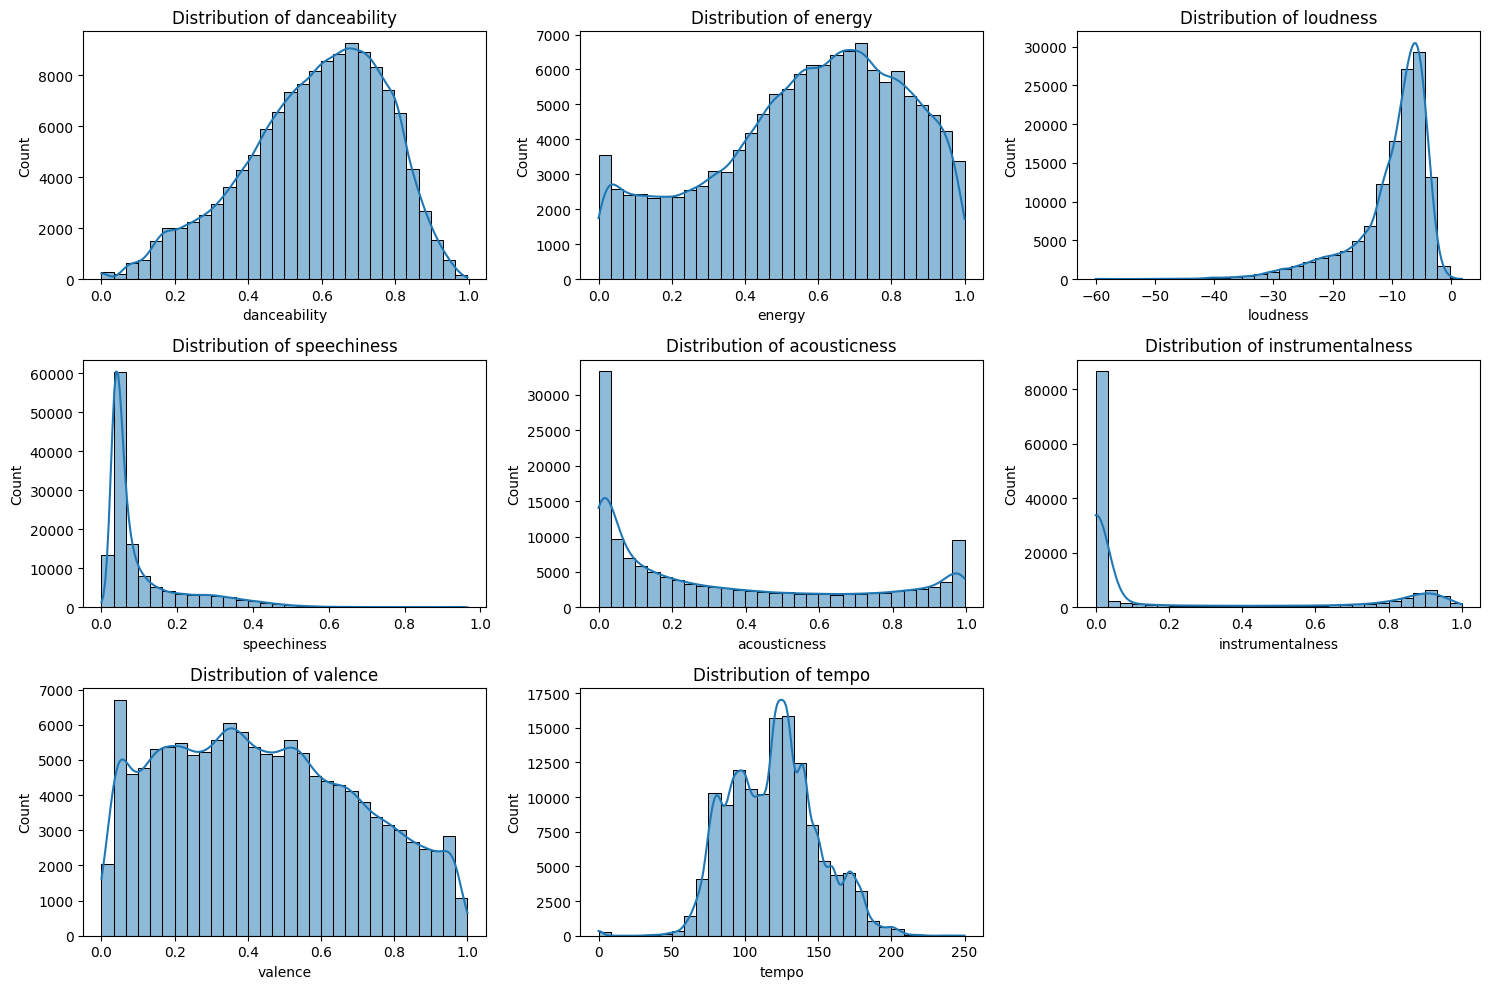

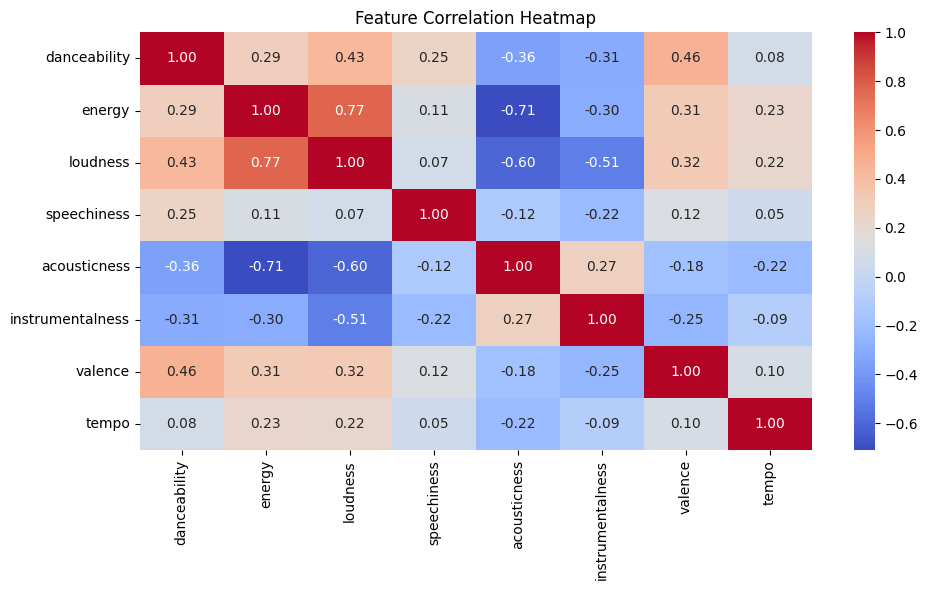

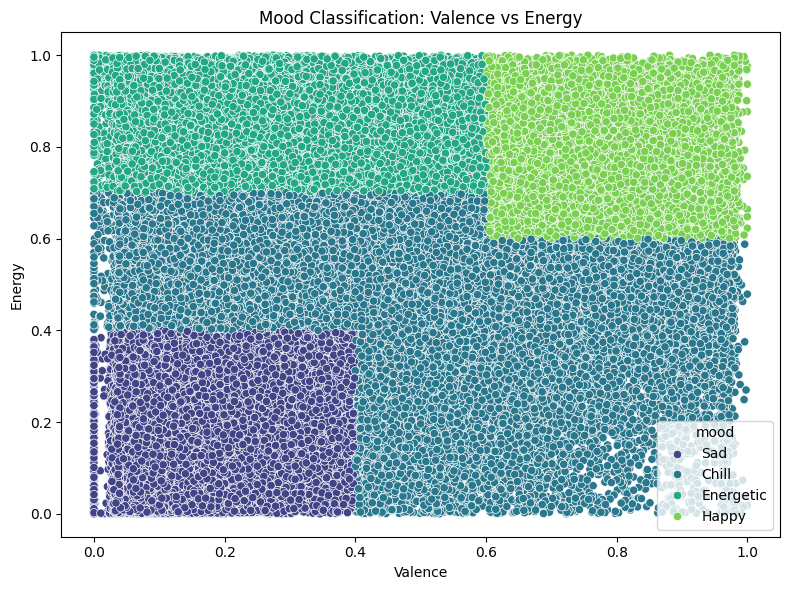

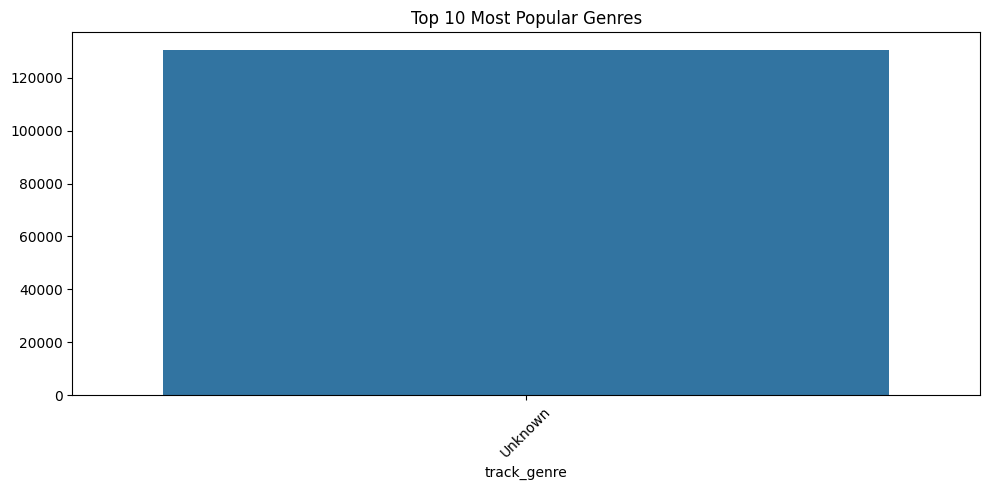


🎵 Recommended Songs 🎵
             track_name          artist_name   mood track_genre
48991      Shape of You  Night Water Project  Happy     Unknown
16886   Out of the Pool          Yo La Tengo  Happy     Unknown
16145          New Moon     Schranzen Danzen  Happy     Unknown
123709  Acoustic Cancer        Sova na Glava  Happy     Unknown

🚀 Training Song Embedding Model 🚀
Epoch 1/20


/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


4084/4084 ━━━━━━━━━━━━━━━━━━━━ 7s 2ms/step - loss: 0.0931
Epoch 2/20
4084/4084 ━━━━━━━━━━━━━━━━━━━━ 10s 1ms/step - loss: 2.5397e-04
Epoch 3/20
4084/4084 ━━━━━━━━━━━━━━━━━━━━ 7s 2ms/step - loss: 1.0285e-04
Epoch 4/20
4084/4084 ━━━━━━━━━━━━━━━━━━━━ 5s 1ms/step - loss: 6.8599e-05
Epoch 5/20
4084/4084 ━━━━━━━━━━━━━━━━━━━━ 7s 2ms/step - loss: 5.4285e-05
Epoch 6/20
4084/4084 ━━━━━━━━━━━━━━━━━━━━ 5s 1ms/step - loss: 5.8664e-05
Epoch 7/20
4084/4084 ━━━━━━━━━━━━━━━━━━━━ 7s 2ms/step - loss: 6.4255e-05
Epoch 8/20
4084/4084 ━━━━━━━━━━━━━━━━━━━━ 5s 1ms/step - loss: 5.1914e-05
Epoch 9/20
4084/4084 ━━━━━━━━━━━━━━━━━━━━ 6s 2ms/step - loss: 5.7053e-05
Epoch 10/20
4084/4084 ━━━━━━━━━━━━━━━━━━━━ 6s 1ms/step - loss: 4.6266e-05
Epoch 11/20
4084/4084 ━━━━━━━━━━━━━━━━━━━━ 6s 1ms/step - loss: 3.8451e-05
Epoch 12/20
4084/4084 ━━━━━━━━━━━━━━━━━━━━ 6s 2ms/step - loss: 3.6120e-05
Epoch 13/20
4084/4084 ━━━━━━━━━━━━━━━━━━━━ 6s 1ms/step - loss: 7.6116e-05
Epoch 14/20
4084/4084 ━━━━━━━━━━━━━━━━━━━━ 7s 2ms/step - loss

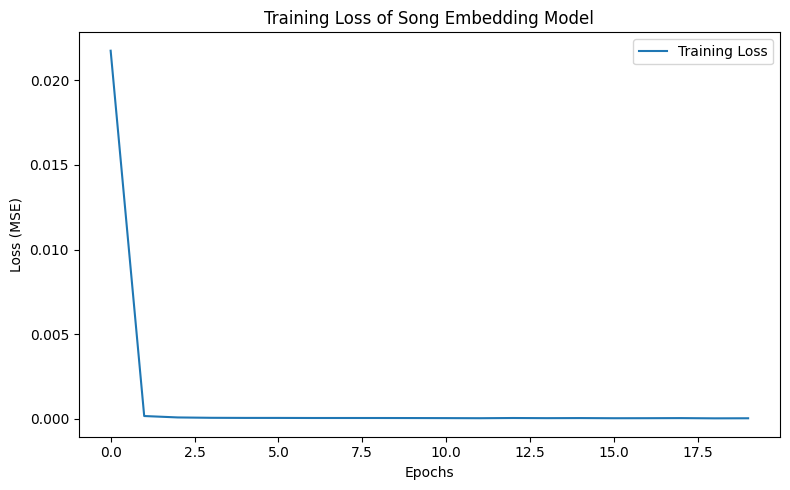

In [16]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import nltk
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import NearestNeighbors
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
import os

# Download NLTK resources
nltk.download("punkt")

# Define paths
file_path = "/content/SpotifyAudioFeaturesApril2019.csv"
FIG_DIR = "/content/figures"
os.makedirs(FIG_DIR, exist_ok=True)

# Check if the file exists
if not os.path.exists(file_path):
    raise FileNotFoundError(f"File not found at {file_path}")

# Load dataset
df = pd.read_csv(file_path)

# Ensure 'track_genre' exists
if 'track_genre' not in df.columns:
    df['track_genre'] = 'Unknown'

# Select relevant audio features
features = [
    'danceability', 'energy', 'loudness', 'speechiness',
    'acousticness', 'instrumentalness', 'valence', 'tempo'
]

# Drop rows with missing feature values
df = df.dropna(subset=features)

# Normalize features
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df[features])

# Train KNN model
knn = NearestNeighbors(n_neighbors=10, metric='euclidean')
knn.fit(df_scaled)

# Mood classification
def get_mood(valence, energy):
    if valence > 0.6 and energy > 0.6:
        return "Happy"
    elif valence < 0.4 and energy < 0.4:
        return "Sad"
    elif energy > 0.7:
        return "Energetic"
    else:
        return "Chill"

df['mood'] = df.apply(lambda r: get_mood(r['valence'], r['energy']), axis=1)

# 📊 1. Feature Distributions
def plot_feature_distributions():
    plt.figure(figsize=(15, 10))
    for i, feature in enumerate(features, 1):
        plt.subplot(3, 3, i)
        sns.histplot(df[feature], kde=True, bins=30)
        plt.title(f"Distribution of {feature}")
    plt.tight_layout()
    plt.savefig(f"{FIG_DIR}/feature_distributions.png", dpi=300, bbox_inches="tight")
    plt.show()
    plt.close()

plot_feature_distributions()

# 📊 2. Correlation Heatmap
def plot_correlation_heatmap():
    plt.figure(figsize=(10, 6))
    sns.heatmap(df[features].corr(), annot=True, cmap="coolwarm", fmt=".2f")
    plt.title("Feature Correlation Heatmap")
    plt.tight_layout()
    plt.savefig(f"{FIG_DIR}/correlation_heatmap.png", dpi=300, bbox_inches="tight")
    plt.show()
    plt.close()

plot_correlation_heatmap()

# 📊 3. Mood Scatter Plot
def plot_mood_scatter():
    plt.figure(figsize=(8, 6))
    sns.scatterplot(
        x=df["valence"],
        y=df["energy"],
        hue=df["mood"],
        palette="viridis"
    )
    plt.xlabel("Valence")
    plt.ylabel("Energy")
    plt.title("Mood Classification: Valence vs Energy")
    plt.tight_layout()
    plt.savefig(f"{FIG_DIR}/mood_scatter.png", dpi=300, bbox_inches="tight")
    plt.show()
    plt.close()

plot_mood_scatter()

# 📊 4. Genre Distribution
def plot_genre_distribution():
    plt.figure(figsize=(10, 5))
    top_genres = df["track_genre"].value_counts().nlargest(10)
    sns.barplot(x=top_genres.index, y=top_genres.values)
    plt.xticks(rotation=45)
    plt.title("Top 10 Most Popular Genres")
    plt.tight_layout()
    plt.savefig(f"{FIG_DIR}/genre_distribution.png", dpi=300, bbox_inches="tight")
    plt.show()
    plt.close()

plot_genre_distribution()

# 📊 5. Training Loss Plot
def plot_training_loss(history):
    plt.figure(figsize=(8, 5))
    plt.plot(history.history["loss"], label="Training Loss")
    plt.xlabel("Epochs")
    plt.ylabel("Loss (MSE)")
    plt.title("Training Loss of Song Embedding Model")
    plt.legend()
    plt.tight_layout()
    plt.savefig(f"{FIG_DIR}/training_loss.png", dpi=300, bbox_inches="tight")
    plt.show()
    plt.close()

# 🎵 Recommendation function
def recommend_songs(song_name, mood=None, genre=None):
    song_row = df[df['track_name'].str.lower() == song_name.lower()]
    if song_row.empty:
        return "Song not found!"

    song_features = scaler.transform(song_row[features])
    _, indices = knn.kneighbors(song_features)

    recs = df.iloc[indices[0]][
        ['track_name', 'artist_name', 'mood', 'track_genre']
    ]

    if mood:
        recs = recs[recs['mood'].str.lower() == mood.lower()]
    if genre:
        recs = recs[recs['track_genre'].str.lower() == genre.lower()]

    return recs if not recs.empty else "No matches found."

# 🎶 Train embedding model
def train_song_embedding_model():
    model = Sequential([
        Dense(64, activation='relu', input_dim=len(features)),
        Dense(32, activation='relu'),
        Dense(16, activation='relu'),
        Dense(len(features), activation='linear')
    ])
    model.compile(optimizer='adam', loss='mse')
    history = model.fit(df_scaled, df_scaled, epochs=20, verbose=1)
    plot_training_loss(history)
    return model

# Example usage
print("\n🎵 Recommended Songs 🎵")
print(recommend_songs("Shape of You", mood="Happy"))

print("\n🚀 Training Song Embedding Model 🚀")
embedding_model = train_song_embedding_model()


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
df.head(10)

,artist_name,track_id,track_name,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence,popularity,mood
0,YG,2RM4jf1Xa9zPgMGRDiht8O,"Big Bank feat. 2 Chainz, Big Sean, Nicki Minaj",0.005820,0.743,238373,0.339,0.000,1,0.0812,-7.678,1,0.4090,203.927,4,0.118,15,Sad
1,YG,1tHDG53xJNGsItRA3vfVgs,BAND DRUM (feat. A$AP Rocky),0.024400,0.846,214800,0.557,0.000,8,0.2860,-7.259,1,0.4570,159.009,4,0.371,0,Chill
2,R3HAB,6Wosx2euFPMT14UXiWudMy,Radio Silence,0.025000,0.603,138913,0.723,0.000,9,0.0824,-5.890,0,0.0454,114.966,4,0.382,56,Energetic
3,Chris Cooq,3J2Jpw61sO7l6Hc7qdYV91,Lactose,0.029400,0.800,125381,0.579,0.912,5,0.0994,-12.118,0,0.0701,123.003,4,0.641,0,Chill
4,Chris Cooq,2jbYvQCyPgX3CdmAzeVeuS,Same - Original mix,0.000035,0.783,124016,0.792,0.878,7,0.0332,-10.277,1,0.0661,120.047,4,0.928,0,Happy
5,Curbo,26Y1lX7ZOpw9Ql3gGAlqLK,Debauchery - Original mix,0.001150,0.810,124016,0.417,0.919,9,0.1060,-10.783,0,0.0793,120.025,4,0.837,0,Chill
6,Bingo Play,5eIyK73BrxHLnly4F9PWqg,Grandma - Original mix,0.000539,0.819,132742,0.720,0.863,4,0.0727,-8.895,0,0.1510,124.003,4,0.934,0,Happy
7,G Herbo,13Mf2ZBpfNkgWJowvM5hXh,Bon appétit,0.115000,0.885,181838,0.348,0.000,9,0.1070,-12.569,1,0.4510,142.111,4,0.180,0,Sad
8,34 Feet,7BQaRTHk44DkMhIVNcXy2D,Among - Original mix,0.000058,0.740,124016,0.472,0.847,8,0.0959,-9.008,1,0.0551,120.034,4,0.622,0,Chill
9,Chris Cooq,049RxG2laEl9U1PGYeIqLV,Hazard - Original mix,0.000081,0.813,132742,0.731,0.910,11,0.0727,-8.932,1,0.0697,124.031,4,0.944,0,Happy


In [ ]:
# 🎵 Most Energetic Songs
def top_energetic_songs(n=10):
    """Display top N songs with highest energy"""
    top_songs = df[['track_name', 'artist_name', 'energy']].sort_values(by='energy', ascending=False).head(n)
    print("\n🔋 Top Energetic Songs 🔋")
    print(top_songs)

top_energetic_songs(10)



🔋 Top Energetic Songs 🔋
                      track_name                artist_name  energy
46014            Heavy Rain Loop                Rain Sounds     1.0
58607    Sheltered From The Rain                Rain Sounds     1.0
21003       Rain Thunderstorms N              Anna Thompson     1.0
32092  Heavy Rain Loop (No Fade)  Rain Sounds Factory STHLM     1.0
59750           Calm Gentle Rain                Rain Sounds     1.0
59753       It's Raining Outside                Rain Sounds     1.0
70157   Spa and Yoga Rain Sounds                Rain Sounds     1.0
85323            Tropical Forest                Rain Sounds     1.0
30973          Wide Stereo Waves      Ocean Waves For Sleep     1.0
50603            Increasing Rain               Ambient Rain     1.0


In [ ]:
# 🔊 Loudest Songs
def loudest_songs(n=10):
    """Find top N loudest songs"""
    top_songs = df[['track_name', 'artist_name', 'loudness']].sort_values(by='loudness', ascending=True).head(n)  # Loudness is in negative values
    print("\n🔊 Loudest Songs 🔊")
    print(top_songs)

loudest_songs(10)



🔊 Loudest Songs 🔊
                     track_name        artist_name  loudness
94232   Pure Love(Instrumental)             Iamsu!     -60.0
60844                  Delicate           Old Bike     -60.0
55558                This Is Me           Old Bike     -60.0
55557            All Falls Down           Old Bike     -60.0
69635            Sucker for You           Old Bike     -60.0
50315               Khaki Pants           Old Bike     -60.0
71073                  Stir Fry           Old Bike     -60.0
71072                Don't Mind           Old Bike     -60.0
102933                  Resolve  Spencer Wymetalek     -60.0
80442                     Sober           Old Bike     -60.0


In [ ]:
# 💃 Most Danceable Songs
def most_danceable_songs(n=10):
    """Find most danceable tracks"""
    top_songs = df[['track_name', 'artist_name', 'danceability']].sort_values(by='danceability', ascending=False).head(n)
    print("\n💃 Most Danceable Songs 💃")
    print(top_songs)

most_danceable_songs(10)



💃 Most Danceable Songs 💃
                  track_name        artist_name  danceability
35119             Tappy Toes         Louie Zong         0.996
68976       Familiar Feeling             TÂCHES         0.986
82706             No Worries       Jean Tonique         0.986
23717   Jazzy Guitars Needed       DJ Juan 9000         0.986
66741           Paper Plates  The Real Triple D         0.986
106124                Appels          Big Koola         0.986
130180  POP, LOCK & DROPDEAD         ITSOKTOCRY         0.985
2366       '91 Bimmer, Pt. 1              Dweeb         0.985
108369               Pretend             Seelva         0.985
21912     Hear Her Sing Baby     De Sound Waves         0.985


/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128313 (\N{SMALL BLUE DIAMOND}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


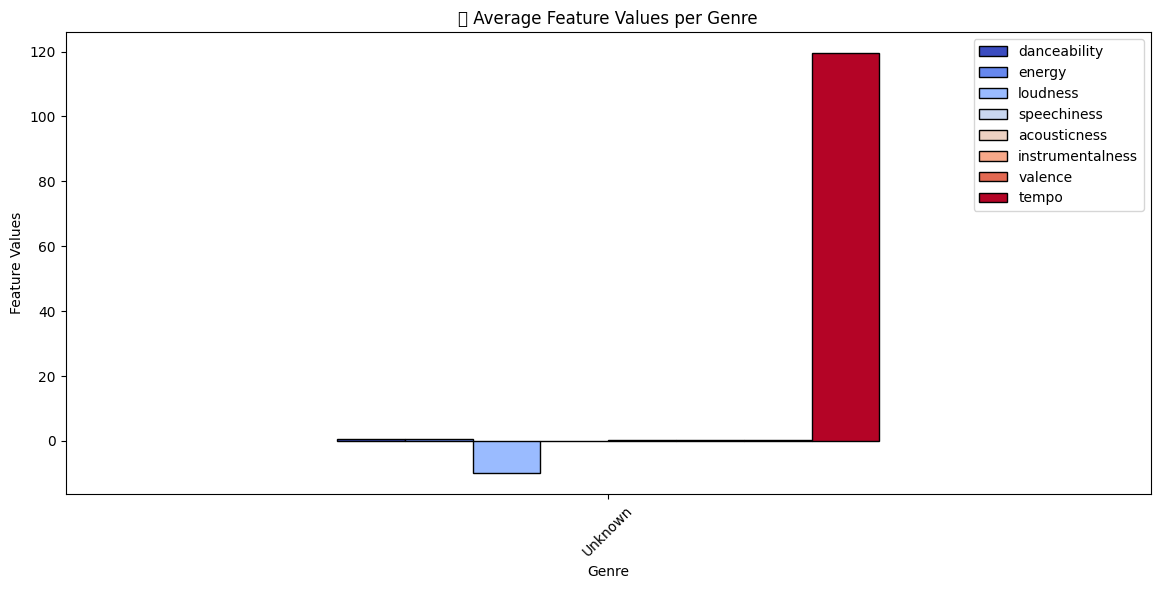

In [ ]:
# 📊 Avg Feature Values per Genre
def plot_avg_features_by_genre():
    """Plot average feature values per genre"""
    avg_features = df.groupby('track_genre')[features].mean().sort_values(by='energy', ascending=False).head(10)
    avg_features.plot(kind='bar', figsize=(14, 6), cmap="coolwarm", edgecolor="black")
    plt.title("🔹 Average Feature Values per Genre")
    plt.xlabel("Genre")
    plt.ylabel("Feature Values")
    plt.xticks(rotation=45)
    plt.legend(loc="upper right")
    plt.show()

plot_avg_features_by_genre()


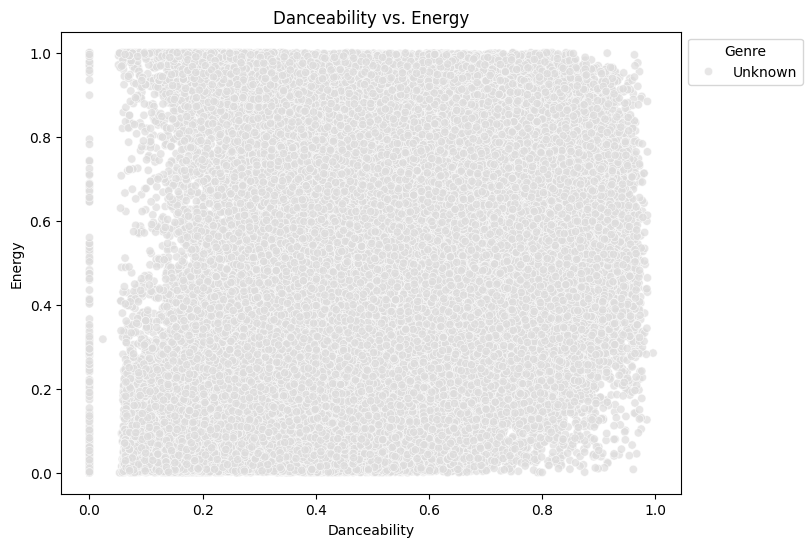

In [ ]:
# 🎭 Danceability vs. Energy
def plot_danceability_vs_energy():
    """Visualize the relation between danceability and energy"""
    plt.figure(figsize=(8, 6))
    sns.scatterplot(x=df["danceability"], y=df["energy"], hue=df["track_genre"], palette="coolwarm", alpha=0.7)
    plt.title("Danceability vs. Energy")
    plt.xlabel("Danceability")
    plt.ylabel("Energy")
    plt.legend(title="Genre", bbox_to_anchor=(1, 1))
    plt.show()

plot_danceability_vs_energy()


<ipython-input-14-90c35e2e1ce8>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x="track_genre", y="tempo", data=df_filtered, palette="muted")


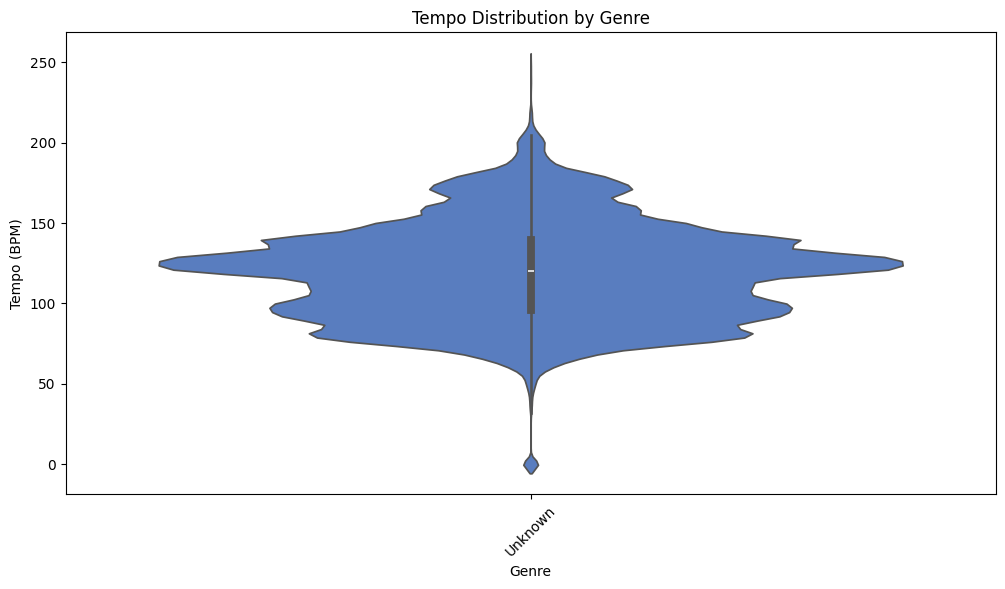

In [ ]:
# 🎼 Tempo Distribution by Genre
def plot_tempo_distribution():
    """Show tempo distribution using violin plot"""
    plt.figure(figsize=(12, 6))
    top_genres = df['track_genre'].value_counts().nlargest(5).index  # Select top 5 genres
    df_filtered = df[df["track_genre"].isin(top_genres)]
    sns.violinplot(x="track_genre", y="tempo", data=df_filtered, palette="muted")
    plt.title("Tempo Distribution by Genre")
    plt.xlabel("Genre")
    plt.ylabel("Tempo (BPM)")
    plt.xticks(rotation=45)
    plt.show()

plot_tempo_distribution()


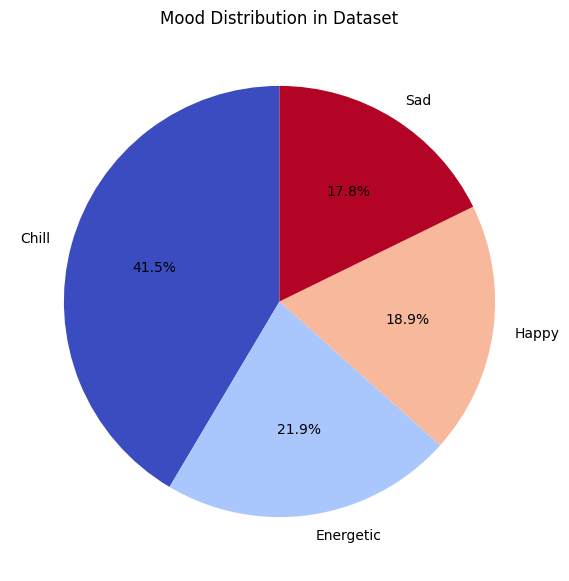

In [ ]:
# 🧠 Mood Count Pie Chart
def plot_mood_pie_chart():
    """Show mood distribution in dataset"""
    plt.figure(figsize=(7, 7))
    df["mood"].value_counts().plot(kind="pie", autopct="%1.1f%%", cmap="coolwarm", startangle=90)
    plt.title("Mood Distribution in Dataset")
    plt.ylabel("")  # Hide y-axis label
    plt.show()

plot_mood_pie_chart()


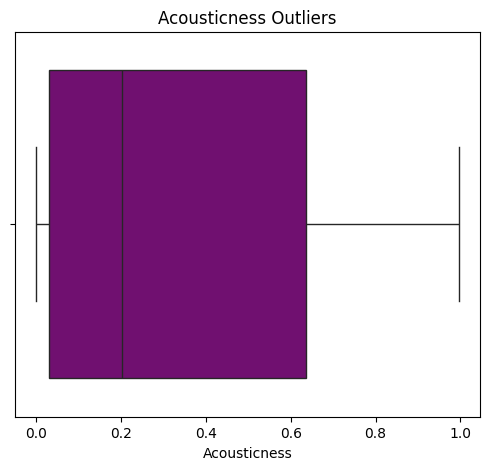

In [ ]:
# 🎻 Acousticness Outliers
def plot_acousticness_boxplot():
    """Identify songs with extreme acousticness"""
    plt.figure(figsize=(6, 5))
    sns.boxplot(x=df["acousticness"], color="purple")
    plt.title("Acousticness Outliers")
    plt.xlabel("Acousticness")
    plt.show()

plot_acousticness_boxplot()


<ipython-input-17-1b1063a21e6c>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_artists.index, y=top_artists.values, palette="coolwarm")


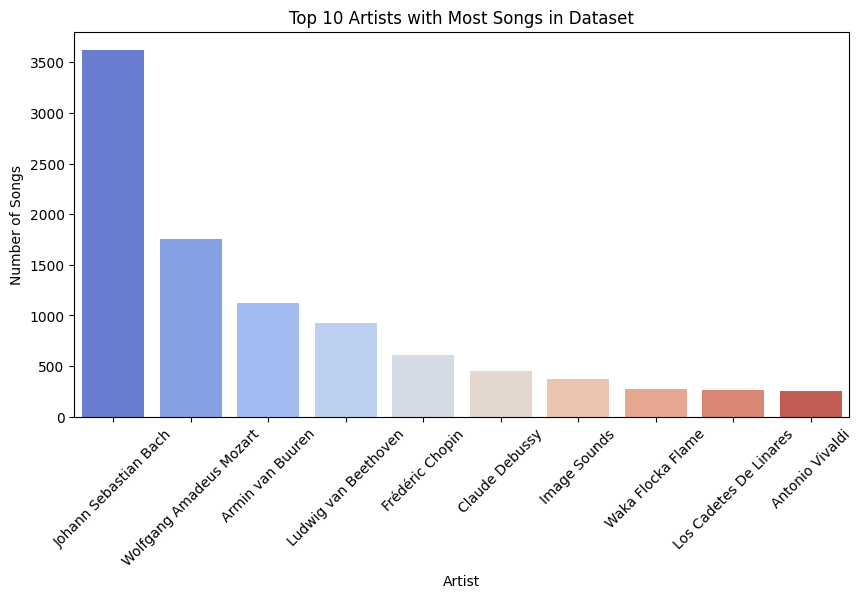

In [ ]:
# 🎤 Most Popular Artists
def top_artists():
    """Find top artists with most songs"""
    plt.figure(figsize=(10, 5))
    top_artists = df["artist_name"].value_counts().nlargest(10)
    sns.barplot(x=top_artists.index, y=top_artists.values, palette="coolwarm")
    plt.xticks(rotation=45)
    plt.xlabel("Artist")
    plt.ylabel("Number of Songs")
    plt.title("Top 10 Artists with Most Songs in Dataset")
    plt.show()

top_artists()


In [ ]:
# 🎙️ Songs with Highest Speechiness
def songs_with_high_speechiness(n=10):
    """Find top N songs with highest speechiness"""
    top_songs = df[['track_name', 'artist_name', 'speechiness']].sort_values(by='speechiness', ascending=False).head(n)
    print("\n🎙️ Songs with Highest Speechiness 🎙️")
    print(top_songs)

songs_with_high_speechiness(10)



🎙️ Songs with Highest Speechiness 🎙️
                                               track_name        artist_name  \
124905                                        Paul - Skit     Paul Rosenberg   
61774                              Sugar Baby (Interlude)       Santo Subito   
17196                                Taffy Was a Welshman      Mickey Avalon   
82473                                               Super  Brother Larmatine   
28639                                   Cub Scout Dropout    R. Scott Murphy   
114989                                reunion/not so fast        Tenacious D   
80359                                            Se Konsa  Brother Larmatine   
51276                                             Ranging           Juicifer   
71809                                    Confusion (Skit)          Yz Elijah   
31012   Chick-Fil-A: The Rest of the Leonardo Dicaprio...    R. Scott Murphy   

        speechiness  
124905        0.966  
61774         0.964  
17196         0